# Chocolate Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Data
The data consists of 9 columns:
1. Sales Person - Name of the sales person
2. Geography - Country where the chocolates are sold
3. Product - Name of the product
4. Amount - Price at which the chocolates were sold
5. Units - Number of units of chocolates sold
6. cost per unit - Price of one unit of chocolate
7. Cost - Price at which chocolates were bought ny the sales person
8. Profit - Profit made
9. profit % - Percentage of profit made.

In [2]:
data = pd.read_csv('/kaggle/input/choclate-sales-project/choclate protfolio project - 11.csv')
data.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%


In [3]:
data.describe()

,Units,cost per unit
count,300.000000,300.000000
mean,152.200000,9.473333
std,118.099499,3.457717
min,0.000000,3.000000
25%,54.000000,6.000000
50%,124.500000,9.000000
75%,220.500000,12.000000
max,525.000000,17.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   300 non-null    object
 1   Geography      300 non-null    object
 2   Product        300 non-null    object
 3   Amount         300 non-null    object
 4   Units          300 non-null    int64 
 5   cost per unit  300 non-null    int64 
 6   Cost           300 non-null    object
 7   Profit         300 non-null    object
 8   profit %       300 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.2+ KB


In [5]:
data.isna().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

*Profit* column is of object type and has '()' and '$' symbols, we will have to delete these symbols to visualize the data easily.

In [6]:
data['Profit'] = data['Profit'].str.replace(r"[()]", "", regex=True)

In [7]:
data['Profit'] = data['Profit'].str.replace(',|\$', "", regex=True)

In [8]:
data['Profit'] = data['Profit'].astype(int)
data['Profit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: Profit
Non-Null Count  Dtype
--------------  -----
300 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


#### Units Sold By A Sales Person

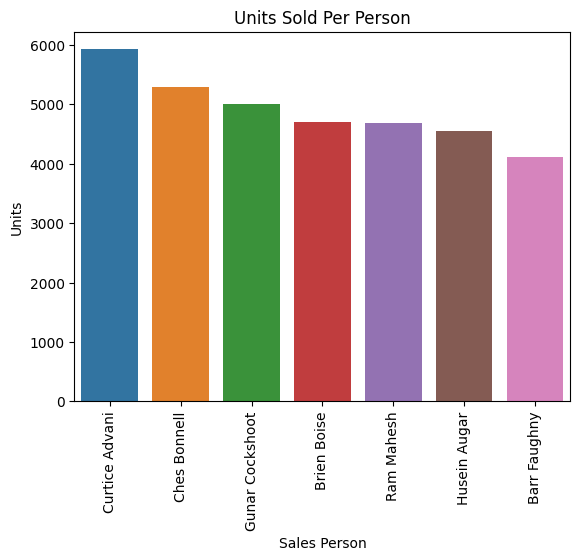

In [9]:
sales_by_person = data.groupby(['Sales Person'], as_index=False)['Units'].sum().sort_values(by='Units', ascending=False).head(7)

sns.barplot(x='Sales Person', y='Units', data=sales_by_person)
plt.xticks(rotation=90)
plt.title('Units Sold Per Person')
plt.show()

In [10]:
data['Product'].unique()

array(['70% Dark Bites', 'Choco Coated Almonds', 'Almond Choco',
       'Drinking Coco', 'White Choc', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', 'After Nines', '50% Dark Bites', 'Eclairs',
       'Mint Chip Choco', 'Milk Bars', 'Manuka Honey Choco',
       'Orange Choco', 'Fruit & Nut Bars', '99% Dark & Pure',
       'Raspberry Choco', '85% Dark Bars', 'Organic Choco Syrup',
       'Caramel Stuffed Bars', 'Spicy Special Slims',
       "Baker's Choco Chips"], dtype=object)

#### Units Sold Per Product

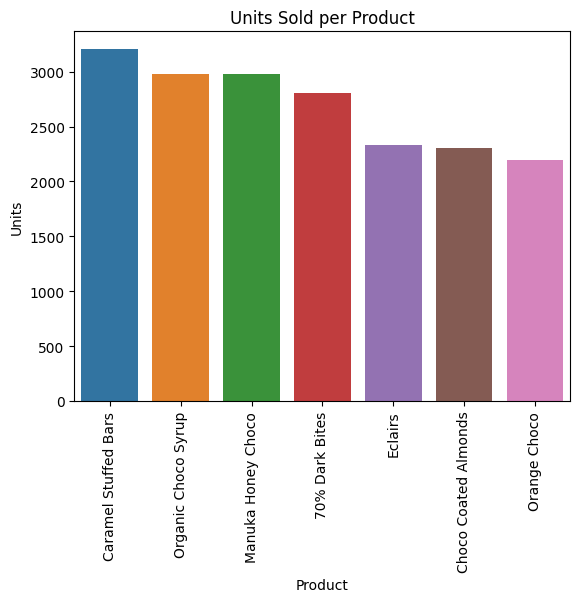

In [11]:
sales_by_product = data.groupby(['Product'], as_index=False)['Units'].sum().sort_values(by='Units', ascending=False).head(7)

sns.barplot(x='Product', y='Units', data=sales_by_product)
plt.xticks(rotation=90)
plt.title('Units Sold per Product')
plt.show()

#### Units Sold per Country

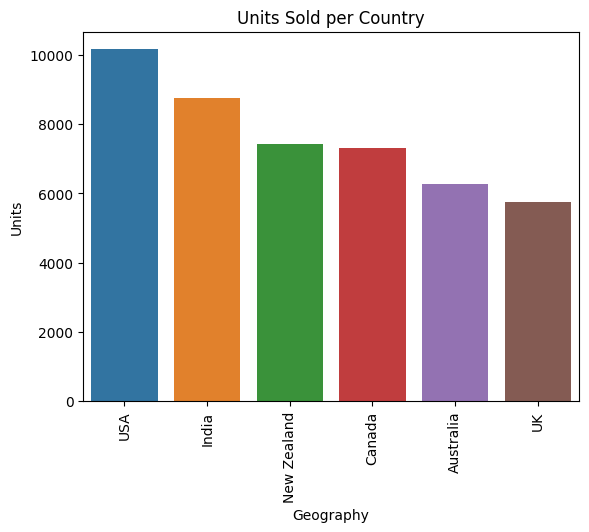

In [12]:
sales_by_geo = data.groupby(['Geography'], as_index=False)['Units'].sum().sort_values(by='Units', ascending=False).head(7)

sns.barplot(x='Geography', y='Units', data=sales_by_geo)
plt.xticks(rotation=90)
plt.title('Units Sold per Country')
plt.show()

#### Profit Made by Individual Sales Person

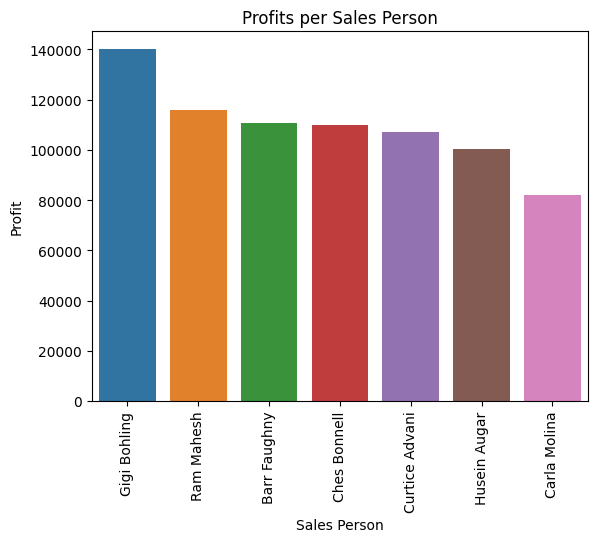

In [13]:
profit_by_per = data.groupby(['Sales Person'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(7)

sns.barplot(x='Sales Person', y='Profit', data=profit_by_per)
plt.xticks(rotation=90)
plt.title('Profits per Sales Person')
plt.show()

In [14]:
profit_by_per

,Sales Person,Profit
5,Gigi Bohling,140185
9,Ram Mahesh,115790
0,Barr Faughny,110803
3,Ches Bonnell,110105
4,Curtice Advani,107259
7,Husein Augar,100171
2,Carla Molina,81986


#### Profit Made by Products

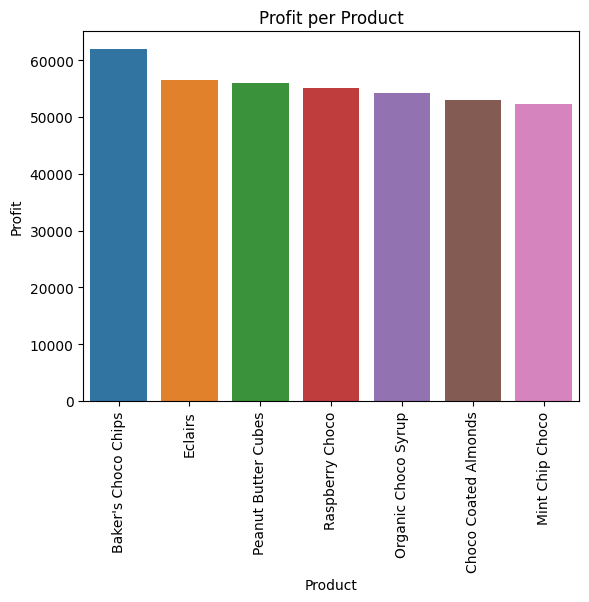

In [15]:
profit_by_prod = data.groupby(['Product'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(7)

sns.barplot(x='Product', y='Profit', data=profit_by_prod)
plt.xticks(rotation=90)
plt.title('Profit per Product')
plt.show()

#### Profit Made From Individual Countries

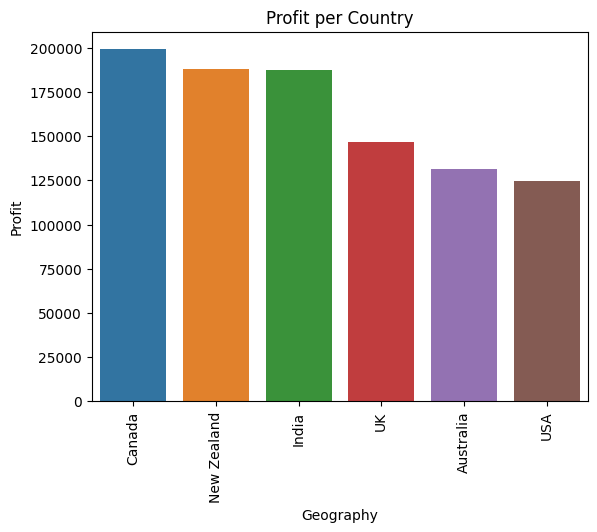

In [16]:
profit_by_geo = data.groupby(['Geography'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)

sns.barplot(x='Geography', y='Profit', data=profit_by_geo)
plt.xticks(rotation=90)
plt.title('Profit per Country')
plt.show()

## Conclusion
* The Most Sold Product is **Caramel Stuffed Bars**.
* The country with most purchases is **USA** followed by **India**.
* The Most profitable product is **Baker's Choco Chips**.
* Country that generates the most profit is **Canada** followed by **New Zealand**.